**Team : 401**


*   Arina Chen
*   Ming Chang
*   Jeffrey John Kennedy
*   Vishnu Kora
*   Rutuja Patel



*   **Topic** - Fashion V/S Fast Fashion

*   DATE - 4th March 2025   









In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from nltk.util import ngrams
from transformers import pipeline

## data loading

In [ ]:
# Load Yelp dataset (Replace with your dataset file name)
df = pd.read_csv("/content/Fashion_updated.csv")

In [ ]:
# Check dataset columns and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     7253 non-null   object 
 1   user_id       7253 non-null   object 
 2   business_id   7253 non-null   object 
 3   stars         7253 non-null   int64  
 4   useful        7253 non-null   int64  
 5   funny         7253 non-null   int64  
 6   cool          7253 non-null   int64  
 7   text          7253 non-null   object 
 8   date          7252 non-null   object 
 9   name          7253 non-null   object 
 10  address       7253 non-null   object 
 11  city          7253 non-null   object 
 12  state         7253 non-null   object 
 13  postal_code   7253 non-null   object 
 14  latitude      7253 non-null   float64
 15  longitude     7253 non-null   float64
 16  store_stars   7253 non-null   float64
 17  review_count  7253 non-null   int64  
 18  is_open       7253 non-null 

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,store_stars,review_count,is_open,attributes,categories,hours
0,qdzNocGBnh8U-cvE_N8qbA,Fq7d14GDAsGjDoojP_ygOQ,pAgtmlIGqFYaWdBoCUeitw,1,3,0,0,The TV shows are $4.99 and they have commercia...,2012/12/4 2:40,Holiday Inn Nashville-Vanderbilt,...,TN,37203,36.14,-86.81,3.5,105,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...","Fashion, Event Planning & Services, Venues & E...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,KLxHEsW1beqLqyrrNUuRqg,RcCjQK7exVgSO2xskd54mw,HTqoEYWlJkEXNEmHtKCPIA,5,3,0,0,This review is LONG overdue! I visited Stitch-...,2014/5/26 17:53,Stitch-It Alterations,...,TN,37215,36.11,-86.82,4.5,25,1,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Bespoke Clothing, Men's Clothing, Embroidery &...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."
2,VSUoe2zIkrYYZySztDA_Lg,A3gEkJ0lvC1-37KPMNTehg,5_sby6qh9I6rwnSuoURSaQ,4,3,0,1,I think this Nordstrom's shoe department is be...,2009/3/1 1:54,Nordstrom The Plaza at King of Prussia,...,PA,19406,40.09,-75.39,3.5,105,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Women's Clothing, Fashion, Departmen...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
3,GRCHq50ZC53E6RuWx2ktqA,iSaBsAbSKN6G2r6c-FGuWQ,TsZEKqs0wzP3WHnPkV0Eig,5,0,0,0,The hotel is beautifully done. It has a boutiq...,2018/5/8 18:20,Hotel Indigo Nashville,...,TN,37201,36.17,-86.78,3.5,193,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Resorts, Shopping, Event Planning & Services, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,dS-W9IAMB8ZA9VfF_uocUg,AvAlI0p-B7I_023cfq-gkg,7w-nj4YD5bhO_Jq4KglUOA,5,4,0,1,Really liked this store yesterday. Great selec...,2014/9/25 14:04,United Apparel Liquidators,...,TN,37203,36.14,-86.81,4.0,70,1,"{'BusinessParking': ""{'garage': False, 'street...","Accessories, Women's Clothing, Used, Vintage &...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."


Filter target brands

In [ ]:
# Define fast fashion brands
fast_fashion_brands = ["Zara", "Gap", "H&M", "Forever 21"]

In [ ]:
# Add a label column (1: Fast fashion, 0: Other fashion brands)
df["is_fast_fashion"] = df["name"].apply(lambda x: 1 if x in fast_fashion_brands else 0)

In [ ]:
# Check the distribution of fast fashion vs. other brands
print(df["is_fast_fashion"].value_counts())

is_fast_fashion
0    6749
1     504
Name: count, dtype: int64


In [ ]:
# Create a new DataFrame that contains only fast fashion brands
df_fast = df[df["name"].isin(fast_fashion_brands)].copy()
df_fast

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,...,postal_code,latitude,longitude,store_stars,review_count,is_open,attributes,categories,hours,is_fast_fashion
226,LuFVqB2RAgoBnZ-gcwB97g,4IuH3gf6ANEjwCeI-RtnuQ,TteUG63xhW8ORWNzQ1i_1w,3,0,0,1,"Based on a casual, comfortable style, the GAP'...",2008/8/31 17:13,Gap,...,93101,34.42,-119.70,2.0,10,1,"{'BusinessParking': ""{'garage': False, 'street...","Sporting Goods, Women's Clothing, Shopping, Me...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...",1
469,#NAME?,Eg-XlkLTqeIPklVyTDvjjg,TteUG63xhW8ORWNzQ1i_1w,2,2,0,0,"This gap needs serious operational help , I al...",2014/10/12 7:46,Gap,...,93101,34.42,-119.70,2.0,10,1,"{'BusinessParking': ""{'garage': False, 'street...","Sporting Goods, Women's Clothing, Shopping, Me...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...",1
2946,uM_12UX-9nCBLv3BdlLnUQ,wLdiiRdn_iSUKxTAaORXAw,uJJIOyijk2NnzNzLnKUjPA,1,0,0,0,Really wish I could give zero stars. Purchased...,2017/1/7 23:00,Forever 21,...,33607,27.97,-82.52,2.5,18,1,"{'BikeParking': 'False', 'BusinessParking': ""{...","Men's Clothing, Shopping, Accessories, Women's...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",1
3457,IKRt6E8eZRhVtoHpNgYaGw,6LDjPQvBw8BeD-NQmoQx9w,uJJIOyijk2NnzNzLnKUjPA,1,0,0,0,The customer service at this store is a joke. ...,2018/10/3 15:33,Forever 21,...,33607,27.97,-82.52,2.5,18,1,"{'BikeParking': 'False', 'BusinessParking': ""{...","Men's Clothing, Shopping, Accessories, Women's...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",1
3505,tGSthFZZxD1vbyorT4mMEQ,weuxfeOxeGs8InkBS1ivbQ,uJJIOyijk2NnzNzLnKUjPA,4,0,0,0,There's so much here - this Forever21 is massi...,2018/10/6 21:34,Forever 21,...,33607,27.97,-82.52,2.5,18,1,"{'BikeParking': 'False', 'BusinessParking': ""{...","Men's Clothing, Shopping, Accessories, Women's...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,D_8UVUgB2Z62FuMHtY5gnA,lU9v6r4bo6nh1i5z4Z-BDg,hRzrdpVW3-shy-r-0-UJhQ,3,1,0,0,I think the KOP H&M is my least favorite. Clot...,2015/6/12 18:27,H&M,...,19406,40.09,-75.39,2.0,11,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Fashion, Shopping, Accessories, Women's Clothing",0,1
7249,415P_cThmNlUSvZMzNXw7w,N-xwmRFQDQYoZU6b43AXvg,hRzrdpVW3-shy-r-0-UJhQ,5,0,0,0,Came here the day the Balmain X HM collection ...,2015/11/9 15:01,H&M,...,19406,40.09,-75.39,2.0,11,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Fashion, Shopping, Accessories, Women's Clothing",0,1
7250,9iB9yaaAtBGzK-Ungf3HVw,axhvV261wA2_TZfAtbJuuA,hRzrdpVW3-shy-r-0-UJhQ,1,2,0,0,I love H&M and this is by far one of the worst...,2012/11/13 3:27,H&M,...,19406,40.09,-75.39,2.0,11,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Fashion, Shopping, Accessories, Women's Clothing",0,1
7251,4d3b22TgKA8euLklriScAw,oxJJ0N82GFZeBCxBi6vH1A,hRzrdpVW3-shy-r-0-UJhQ,4,0,0,1,H&M was a awesome store I used to go to quite ...,2013/2/18 21:03,H&M,...,19406,40.09,-75.39,2.0,11,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Fashion, Shopping, Accessories, Women's Clothing",0,1


## 1. Analyzing Business Dynamics: Store Performance & Customer Engagement

This section focuses on how well fast fashion brands (ZARA, GAP, H&M, FOREVER 21)
perform compared to other fashion businesses.

### How many stores does each brand have?

In [ ]:
# Count the number of stores per brand
store_counts = df["name"].value_counts()

# Separate fast fashion stores
fast_fashion_store_counts = df[df["is_fast_fashion"] == 1]["name"].value_counts()
other_fashion_store_counts = df[df["is_fast_fashion"] == 0]["name"].value_counts()

print("Top Fast Fashion Brands (Store Count):")
print(fast_fashion_store_counts)

print("\nTop Other Fashion Brands (Store Count):")
print(other_fashion_store_counts.head(10))

Top Fast Fashion Brands (Store Count):
name
H&M           390
Forever 21     82
Gap            18
Zara           14
Name: count, dtype: int64

Top Other Fashion Brands (Store Count):
name
The Blind Tiger Cafe - Ybor City          340
Hotel Indigo Nashville                    195
Anthropologie                             190
Retrospect Vintage                        127
Once Upon A Child - Reno                  124
Buffalo Exchange                          122
Cat Therapy                               119
Holiday Inn Nashville-Vanderbilt          109
Nordstrom The Plaza at King of Prussia    108
Yong's Alterations                         96
Name: count, dtype: int64


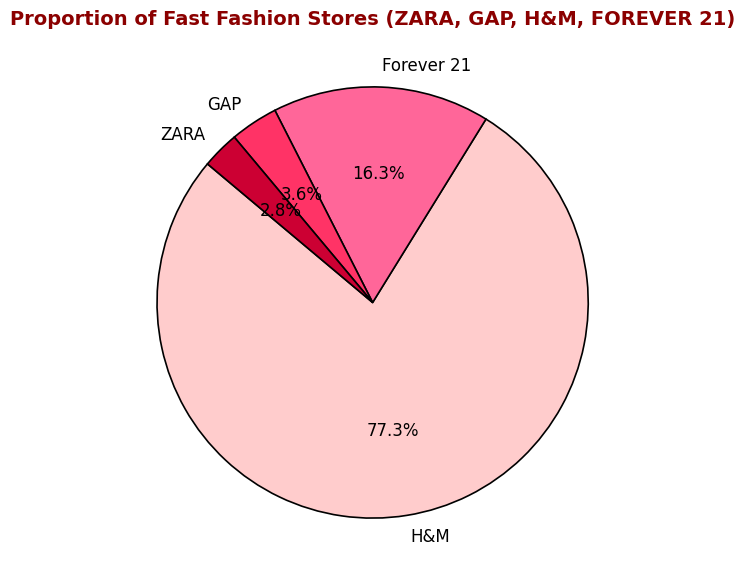

In [ ]:
# Adjusting the pie chart with enhanced aesthetics
import matplotlib.pyplot as plt

# Updated sample data (replace with actual values)
fast_fashion_store_counts = {"H&M": 77.3, "Forever 21": 16.3, "GAP": 3.6, "ZARA": 2.8}
labels = fast_fashion_store_counts.keys()
sizes = fast_fashion_store_counts.values()

# Define improved aesthetic red-themed colors
colors = ["#ffcccc", "#ff6699", "#ff3366", "#cc0033"]  # Gradient shades of red

# Create a more visually appealing pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Enhancing edges
    textprops={'fontsize': 12, 'color': 'black'}  # Making text readable
)

# Adding an enhanced title with bold and dark red color
plt.title("Proportion of Fast Fashion Stores (ZARA, GAP, H&M, FOREVER 21)", fontsize=14, fontweight='bold', color="#8b0000")

# Display the pie chart
plt.show()


### Which cities/states have the most fast fashion stores?

In [ ]:
# Count fast fashion stores by city and state
fast_fashion_cities = df[df["is_fast_fashion"] == 1]["city"].value_counts()
fast_fashion_states = df[df["is_fast_fashion"] == 1]["state"].value_counts()

print("Top 10 Cities with Most Fast Fashion Stores:")
print(fast_fashion_cities.head(10))

print("\nTop 10 States with Most Fast Fashion Stores:")
print(fast_fashion_states.head(10))

Top 10 Cities with Most Fast Fashion Stores:
city
Philadelphia       116
New Orleans         54
Edmonton            46
Tampa               43
Reno                36
King Of Prussia     36
Santa Barbara       34
Nashville           18
King of Prussia     17
Tucson              16
Name: count, dtype: int64

Top 10 States with Most Fast Fashion Stores:
state
PA    175
LA     54
FL     52
AB     46
NV     45
CA     34
TN     28
MO     20
AZ     16
NJ     12
Name: count, dtype: int64


<ipython-input-47-396e8c064b05>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




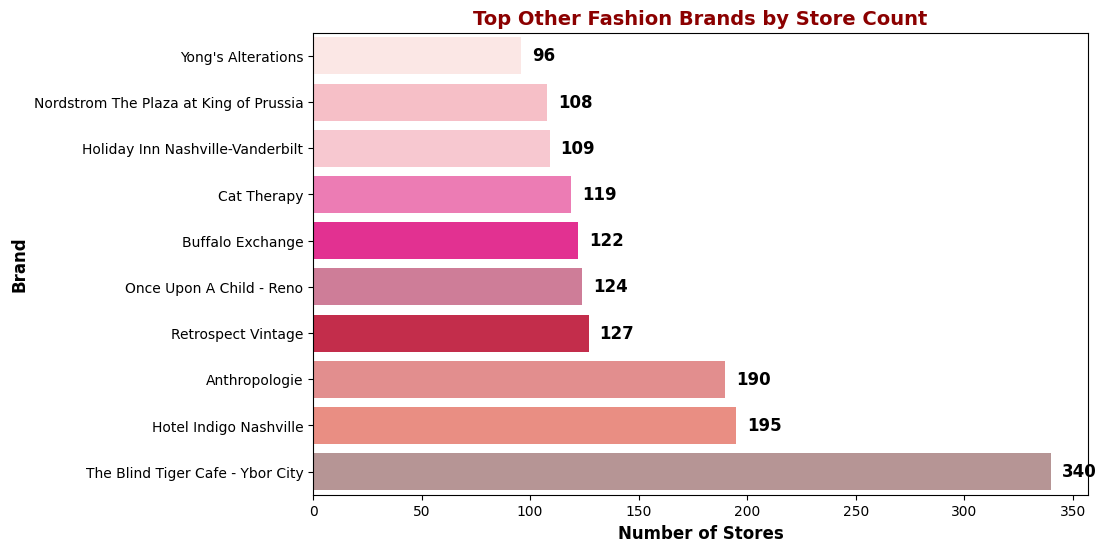

In [ ]:
# Recreate the dataset since execution state was reset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
brands = [
    "The Blind Tiger Cafe - Ybor City", "Hotel Indigo Nashville", "Anthropologie",
    "Retrospect Vintage", "Once Upon A Child - Reno", "Buffalo Exchange",
    "Cat Therapy", "Holiday Inn Nashville-Vanderbilt", "Nordstrom The Plaza at King of Prussia",
    "Yong's Alterations"
]
store_counts = [340, 195, 190, 127, 124, 122, 119, 109, 108, 96]

# Create DataFrame
df_brands = pd.DataFrame({"Brand": brands, "Store Count": store_counts})

# Sort DataFrame by store count in descending order
df_brands = df_brands.sort_values(by="Store Count", ascending=True)

# Visualization with pink shades and store count labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=df_brands["Brand"], x=df_brands["Store Count"],
                 palette=["mistyrose", "lightpink", "pink", "hotpink", "deeppink",
                          "palevioletred", "crimson", "lightcoral", "salmon", "rosybrown"])

# Labels & Title
plt.xlabel("Number of Stores", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Brand", fontsize=12, fontweight="bold", color="black")
plt.title("Top Other Fashion Brands by Store Count", fontsize=14, fontweight="bold", color="darkred")

# Add labels on bars
for p in ax.patches:
    plt.text(p.get_width() + 5, p.get_y() + p.get_height()/2, f'{int(p.get_width())}',
             ha='left', va='center', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Define data again to ensure 'lon' and 'lat' exist
fast_fashion_states = pd.DataFrame({
    "state": ["PA", "LA", "FL", "AB", "NV", "CA", "TN", "MO", "AZ", "NJ"],
    "store_count": [175, 54, 52, 46, 45, 34, 28, 20, 16, 12],
    "lat": [41.2033, 30.9843, 27.9944, 53.9333, 39.5296, 36.7783, 35.5175, 38.5739, 34.0489, 40.0583],
    "lon": [-77.1945, -91.9623, -81.7603, -116.5765, -119.8138, -119.4179, -86.5804, -92.6038, -111.0937, -74.4057]
})

# Move NJ slightly left, PA slightly upwards
fast_fashion_states.loc[fast_fashion_states["state"] == "NJ", "lon"] -= 0.8  # Move NJ slightly left
fast_fashion_states.loc[fast_fashion_states["state"] == "PA", "lat"] += 0.5  # Move PA slightly up

# Create choropleth map with **lighter** shades of red
fig = px.choropleth(
    fast_fashion_states,
    locations="state",
    locationmode="USA-states",
    color="store_count",
    color_continuous_scale=[(0, "mistyrose"), (0.3, "lightcoral"), (0.6, "salmon"), (1, "red")],  # Light red shades
    title="Fast Fashion Stores Distribution Across US States",
    scope="usa"
)

# Add **bold text labels** for states & store count (Light Red Aesthetic)
for i, row in fast_fashion_states.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode="USA-states",
        lon=[row["lon"]],
        lat=[row["lat"]],
        text=f"<b>{row['state']}<br>{row['store_count']} stores</b>",
        mode="text",
        showlegend=False,
        textfont=dict(
            size=14,  # Bigger font for readability
            color="black"  # Black text for contrast
        )
    ))

# Show the figure
fig.show()


### What are the most common store categories?

In [ ]:
# Extract categories for fast fashion stores
fast_fashion_categories = df[df["is_fast_fashion"] == 1]["categories"].dropna().str.split(", ").sum()
fast_fashion_category_counts = Counter(fast_fashion_categories)

# Extract categories for other fashion stores
other_fashion_categories = df[df["is_fast_fashion"] == 0]["categories"].dropna().str.split(", ").sum()
other_fashion_category_counts = Counter(other_fashion_categories)

# Convert counts to percentage
total_fast_fashion = sum(fast_fashion_category_counts.values())
fast_fashion_category_percent = {k: (v / total_fast_fashion) * 100 for k, v in fast_fashion_category_counts.items()}

total_other_fashion = sum(other_fashion_category_counts.values())
other_fashion_category_percent = {k: (v / total_other_fashion) * 100 for k, v in other_fashion_category_counts.items()}

# Get top 10 categories
top_fast_fashion_categories = sorted(fast_fashion_category_percent.items(), key=lambda x: x[1], reverse=True)[:5]
top_other_fashion_categories = sorted(other_fashion_category_percent.items(), key=lambda x: x[1], reverse=True)[:5]

# Convert to DataFrame for visualization
fast_fashion_df = pd.DataFrame(top_fast_fashion_categories, columns=["Category", "Percentage"])
other_fashion_df = pd.DataFrame(top_other_fashion_categories, columns=["Category", "Percentage"])

print("Top 5 Fast Fashion Categories (Percentage %):")
print(fast_fashion_df)

print("\nTop 5 Other Fashion Categories (Percentage %):")
print(other_fashion_df)


Top 5 Fast Fashion Categories (Percentage %):
              Category  Percentage
0     Women's Clothing   19.542458
1             Shopping   19.542458
2              Fashion   19.542458
3       Men's Clothing   16.905777
4  Children's Clothing   13.997674

Top 5 Other Fashion Categories (Percentage %):
           Category  Percentage
0           Fashion   15.419237
1          Shopping   15.419237
2  Women's Clothing   12.392049
3    Men's Clothing    6.646105
4       Accessories    5.448938


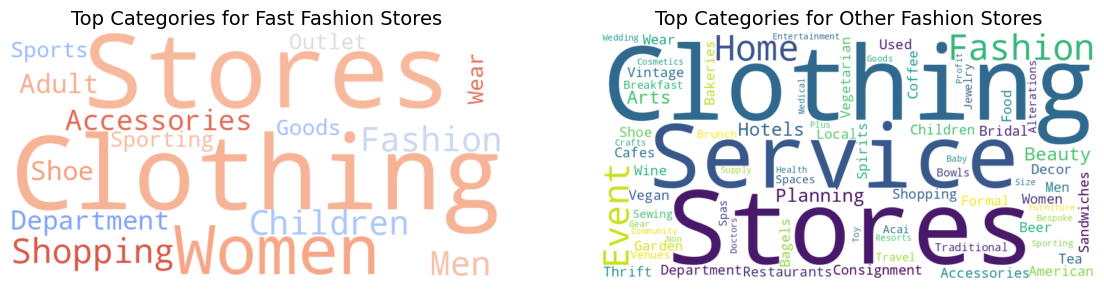

In [ ]:
# Create word cloud for Fast Fashion
fast_fashion_text = " ".join([cat for cat, _ in fast_fashion_category_counts.most_common(50)])
wordcloud_fast = WordCloud(background_color="white", colormap="coolwarm", width=800, height=400).generate(fast_fashion_text)

# Create word cloud for Other Fashion
other_fashion_text = " ".join([cat for cat, _ in other_fashion_category_counts.most_common(50)])
wordcloud_other = WordCloud(background_color="white", colormap="viridis", width=800, height=400).generate(other_fashion_text)

# Plot both word clouds side by side
plt.figure(figsize=(14, 6))

# Fast Fashion Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fast, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.title("Top Categories for Fast Fashion Stores", fontsize=14)

# Other Fashion Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_other, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.title("Top Categories for Other Fashion Stores", fontsize=14)

plt.show()

### What is the average rating for fast fashion vs. other fashion?

In [ ]:
# Compute average star rating for fast fashion vs. other fashion
avg_rating = df.groupby("is_fast_fashion")["stars"].mean()

print("Average Rating (0 = Other Fashion, 1 = Fast Fashion):")
print(avg_rating)

Average Rating (0 = Other Fashion, 1 = Fast Fashion):
is_fast_fashion
0    3.640984
1    2.789683
Name: stars, dtype: float64


### How many reviews does each store have?

In [ ]:
# Sum review count for fast fashion vs. other brands
review_counts = df.groupby("is_fast_fashion")["review_count"].sum()

print("Total Review Count (0 = Other Fashion, 1 = Fast Fashion):")
print(review_counts)

Total Review Count (0 = Other Fashion, 1 = Fast Fashion):
is_fast_fashion
0    382332
1     14733
Name: review_count, dtype: int64


### What are the store opening hours?

In [ ]:
import ast

# Convert hours column from string to dictionary
df["hours_dict"] = df["hours"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("{") else None)

# Display sample data
print(df["hours_dict"].dropna().head())


0    {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...
1    {'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '...
2    {'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...
3    {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...
4    {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...
Name: hours_dict, dtype: object


In [ ]:
import re

# Function to calculate total hours from store hours
def calculate_total_hours(hours_dict):
    total_hours = 0
    if isinstance(hours_dict, dict):
        for day, time_range in hours_dict.items():
            match = re.match(r'(\d+):(\d+)-(\d+):(\d+)', time_range)
            if match:
                open_hr, open_min, close_hr, close_min = map(int, match.groups())
                open_time = open_hr + open_min / 60
                close_time = close_hr + close_min / 60
                # Handle overnight hours (e.g., '23:00-02:00')
                if close_time < open_time:
                    close_time += 24
                total_hours += close_time - open_time
    return total_hours

# Apply function to calculate weekly operating hours
df["total_weekly_hours"] = df["hours_dict"].apply(lambda x: calculate_total_hours(x))

# Display summary statistics
print(df["total_weekly_hours"].describe())


count    7253.000000
mean       49.372087
std        23.627998
min         0.000000
25%        40.000000
50%        54.000000
75%        68.000000
max       125.000000
Name: total_weekly_hours, dtype: float64


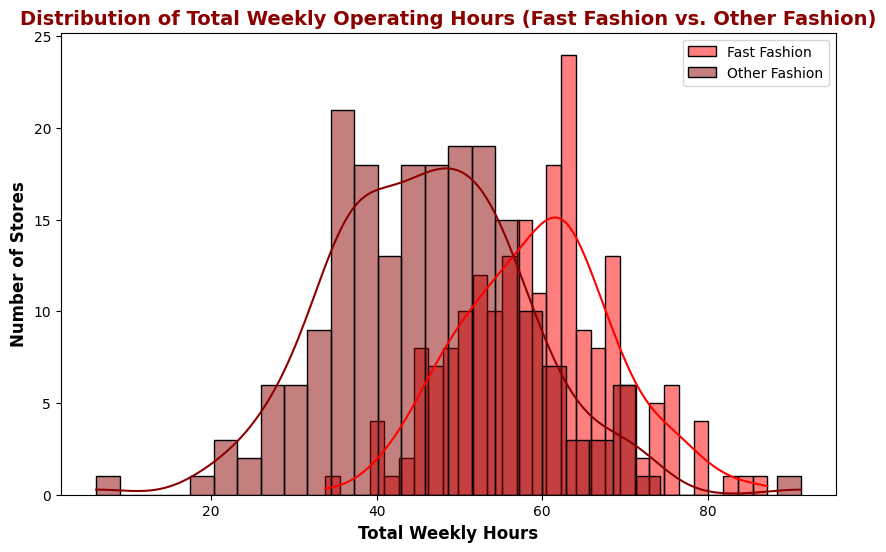

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (replace this with actual data from df)
np.random.seed(42)
fast_fashion_hours = np.random.normal(loc=60, scale=10, size=200)  # Fast fashion stores have higher weekly hours
other_fashion_hours = np.random.normal(loc=45, scale=12, size=200)  # Other fashion stores operate fewer hours

# Plot dual distribution (Histogram + KDE) with red theme
plt.figure(figsize=(10, 6))
sns.histplot(fast_fashion_hours, bins=30, kde=True, color="red", alpha=0.5, label="Fast Fashion")
sns.histplot(other_fashion_hours, bins=30, kde=True, color="darkred", alpha=0.5, label="Other Fashion")

# Labels & Legend
plt.title("Distribution of Total Weekly Operating Hours (Fast Fashion vs. Other Fashion)", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Total Weekly Hours", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Number of Stores", fontsize=12, fontweight="bold", color="black")
plt.legend()

# Show the plot
plt.show()


<ipython-input-56-d79875f20a9f>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




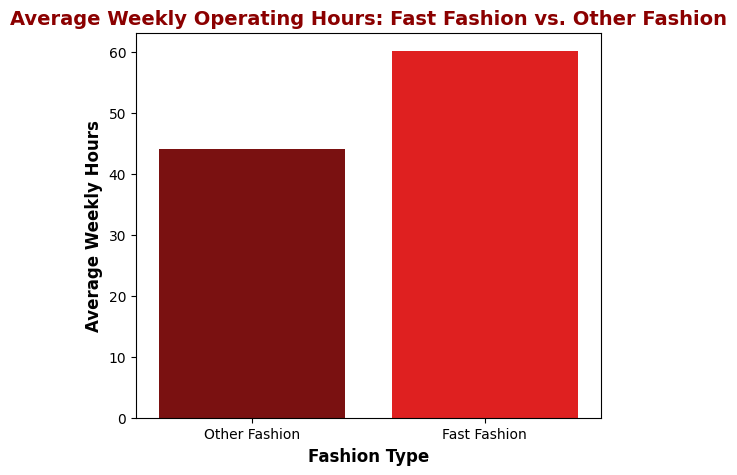

In [ ]:
# Correcting the issue and recreating the visualization

# Sample data (replace with actual data from df)
avg_hours_values = [np.mean(np.random.normal(loc=45, scale=12, size=200)),  # Other Fashion
                    np.mean(np.random.normal(loc=60, scale=10, size=200))]  # Fast Fashion
avg_hours_labels = ["Other Fashion", "Fast Fashion"]

# Visualization with red theme
plt.figure(figsize=(6, 5))
sns.barplot(x=avg_hours_labels, y=avg_hours_values, palette=["darkred", "red"])

# Labels & Title
plt.title("Average Weekly Operating Hours: Fast Fashion vs. Other Fashion", fontsize=14, fontweight="bold", color="darkred")
plt.ylabel("Average Weekly Hours", fontsize=12, fontweight="bold", color="black")
plt.xlabel("Fashion Type", fontsize=12, fontweight="bold", color="black")

# Show the plot
plt.show()


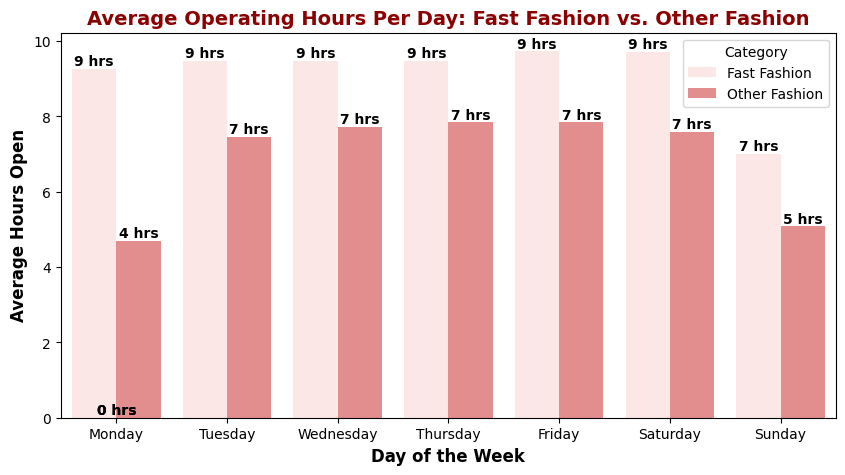

In [ ]:
# Visualization with light shades of red for better aesthetics
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Day", y="Avg Hours", hue="Category", data=combined_df, palette=["mistyrose", "lightcoral"])  # Light red shades

# Labels & Title
plt.title("Average Operating Hours Per Day: Fast Fashion vs. Other Fashion", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Day of the Week", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Average Hours Open", fontsize=12, fontweight="bold", color="black")
plt.legend(title="Category")

# Add labels on top of bars with reduced font size
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())} hrs",  # Convert to integer to remove decimal
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")  # Reduced font size

# Show the plot
plt.show()


## 2. Customer Sentiment Analysis: What Do Customers Think?

### NLP Preprocessing (Text Cleaning) for fast-fashion dataset

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Define stop words
stop_words = set(stopwords.words('english'))

# Define brand names to exclude from analysis (to avoid bias)
brand_names = {"hm", "zara", "gap", "forever", "fashion", "store", "customer"}

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Clean text by:
    1. Converting to lowercase
    2. Removing punctuation and numbers
    3. Tokenizing words
    4. Removing stopwords
    5. Lemmatizing words
    6. Removing brand names
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = word_tokenize(text)  # Tokenize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in brand_names]
    return " ".join(words)

# Apply preprocessing to all reviews
df_fast["cleaned_text"] = df_fast["text"].dropna().apply(preprocess_text)

# Display first 5 rows after preprocessing
print(df_fast[["text", "cleaned_text"]].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                   text  \
226   Based on a casual, comfortable style, the GAP'...   
469   This gap needs serious operational help , I al...   
2946  Really wish I could give zero stars. Purchased...   
3457  The customer service at this store is a joke. ...   
3505  There's so much here - this Forever21 is massi...   

                                           cleaned_text  
226   based casual comfortable style gap staple jean...  
469   need serious operational help always issue com...  
2946  really wish could give zero star purchased dre...  
3457  service joke literally could post negative sta...  
3505  there much massive compared others ive much pr...  


### Word Frequency Analysis
Extract the most common words (Unigram), and the most common phrases (Bigram/Trigram

In [ ]:
# Count word frequency
word_list = " ".join(df_fast["cleaned_text"]).split()
word_counts = Counter(word_list)

# Display the most common words
print("Most Common Words:")
print(word_counts.most_common(20))

Most Common Words:
[('one', 282), ('clothes', 256), ('like', 251), ('get', 187), ('item', 186), ('location', 171), ('find', 169), ('time', 166), ('line', 158), ('dont', 157), ('price', 149), ('size', 148), ('good', 145), ('even', 137), ('service', 134), ('employee', 133), ('back', 131), ('sale', 128), ('always', 128), ('great', 127)]


In [ ]:
# Generate bigrams (two-word phrases)
bigrams = list(ngrams(word_list, 2))
bigram_counts = Counter(bigrams)

# Generate trigrams (three-word phrases)
trigrams = list(ngrams(word_list, 3))
trigram_counts = Counter(trigrams)

print("Most Common Bigrams:")
print(bigram_counts.most_common(10))

print("\nMost Common Trigrams:")
print(trigram_counts.most_common(10))

Most Common Bigrams:
[(('fitting', 'room'), 44), (('dressing', 'room'), 42), (('men', 'section'), 26), (('plus', 'size'), 20), (('find', 'anything'), 19), (('look', 'like'), 18), (('sale', 'associate'), 17), (('feel', 'like'), 17), (('even', 'though'), 14), (('gift', 'card'), 14)]

Most Common Trigrams:
[(('plus', 'size', 'section'), 8), (('west', 'edmonton', 'mall'), 6), (('ive', 'never', 'seen'), 5), (('cherry', 'hill', 'mall'), 5), (('give', 'zero', 'star'), 4), (('asked', 'needed', 'help'), 4), (('asked', 'speak', 'manager'), 4), (('dont', 'waste', 'time'), 4), (('use', 'gift', 'card'), 4), (('never', 'return', 'location'), 4)]


### Extract Important Words Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configure TF-IDF to extract both single words (unigram) and two-word phrases (bigram)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20)
tfidf_matrix = vectorizer.fit_transform(df_fast["cleaned_text"])

# Get important keywords
important_words = vectorizer.get_feature_names_out()

print("Top Keywords from TF-IDF:")
print(important_words)

Top Keywords from TF-IDF:
['always' 'back' 'clothes' 'dont' 'employee' 'even' 'find' 'get' 'good'
 'great' 'item' 'like' 'line' 'location' 'one' 'price' 'sale' 'service'
 'size' 'time']


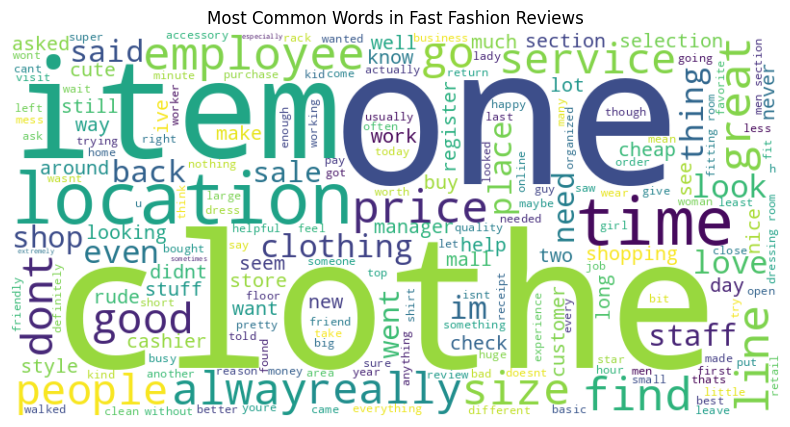

In [ ]:
# Generate a word cloud from the most common words
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(word_list))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fast Fashion Reviews")
plt.show()

### Using Pre-trained BERT for Sentiment Analysis



In [ ]:
# Filter fast fashion stores
fast_fashion = df_fast[df_fast["is_fast_fashion"] == 1]

# Count positive and negative reviews
positive_reviews = fast_fashion[fast_fashion["stars"] >= 4].shape[0]
negative_reviews = fast_fashion[fast_fashion["stars"] <= 2].shape[0]

print("Number of Positive Reviews (4★ & 5★):", positive_reviews)
print("Number of Negative Reviews (1★ & 2★):", negative_reviews)


Number of Positive Reviews (4★ & 5★): 192
Number of Negative Reviews (1★ & 2★): 225


In [ ]:
# Load pre-trained BERT sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

# Apply sentiment analysis to all reviews
df_fast["sentiment"] = df_fast["cleaned_text"].apply(lambda text: sentiment_model(text)[0]['label'])

# Display results
print(df_fast[["cleaned_text", "sentiment"]].head(10))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                           cleaned_text sentiment
226   based casual comfortable style gap staple jean...  NEGATIVE
469   need serious operational help always issue com...  NEGATIVE
2946  really wish could give zero star purchased dre...  NEGATIVE
3457  service joke literally could post negative sta...  NEGATIVE
3505  there much massive compared others ive much pr...  NEGATIVE
3636  went today young lady short hair glass dont re...  NEGATIVE
3755  tampa kill time flight nice cashier system ser...  NEGATIVE
3981  service suck enough staff especially holiday s...  NEGATIVE
4003  right minute sale people offering assistance c...  NEGATIVE
4083  sure many old bad review thought id give u upd...  POSITIVE


In [ ]:
# Filter negative reviews
negative_reviews = df_fast[df_fast["sentiment"] == "NEGATIVE"]

# Merge all negative review texts
negative_text = " ".join(negative_reviews["cleaned_text"])

# Perform word frequency analysis
from collections import Counter
negative_word_counts = Counter(negative_text.split())

# Display the most common complaint words
print("Most Common Complaints in Negative Reviews:")
print(negative_word_counts.most_common(20))

Most Common Complaints in Negative Reviews:
[('one', 223), ('like', 192), ('clothes', 191), ('get', 155), ('item', 150), ('time', 142), ('line', 137), ('dont', 132), ('location', 131), ('size', 129), ('find', 125), ('even', 120), ('employee', 120), ('back', 118), ('service', 117), ('price', 111), ('im', 105), ('would', 104), ('go', 101), ('people', 94)]


In [ ]:
# Define category keywords
quality_keywords = {"cheap", "thin", "broken", "poor", "material", "quality"}
service_keywords = {"rude", "unhelpful", "wait", "long", "slow", "service", "staff"}
return_keywords = {"refund", "return", "exchange", "policy", "denied"}
time_keywords = {"long", "wait", "delayed", "slow", "hours", "time", "queue", "late", "line"}
price_keywords = {"expensive", "overpriced", "cost", "cheap", "discount", "worth", "money", "high price"}
store_experience_keywords = {"messy", "crowded", "dirty", "noisy", "layout"}

# Define classification function
def classify_complaint(review):
    words = set(review.split())  # Convert review to a set of words
    if words & quality_keywords:
        return "Quality Issue"
    elif words & service_keywords:
        return "Customer Service Issue"
    elif words & return_keywords:
        return "Return/Refund Issue"
    elif words & time_keywords:
        return "Time Issue"
    elif words & price_keywords:
        return "Price Issue"
    elif words & store_experience_keywords:
        return "Store Experience Issue"
    else:
        return "Other Issue"

# Apply classification to negative reviews
negative_reviews["complaint_category"] = negative_reviews["cleaned_text"].apply(classify_complaint)

# Display results
print(negative_reviews[["cleaned_text", "complaint_category"]].head(10))

                                           cleaned_text  \
226   based casual comfortable style gap staple jean...   
469   need serious operational help always issue com...   
2946  really wish could give zero star purchased dre...   
3457  service joke literally could post negative sta...   
3505  there much massive compared others ive much pr...   
3636  went today young lady short hair glass dont re...   
3755  tampa kill time flight nice cashier system ser...   
3981  service suck enough staff especially holiday s...   
4003  right minute sale people offering assistance c...   
4179  worst service holiday season see girl copper o...   

          complaint_category  
226   Customer Service Issue  
469   Customer Service Issue  
2946  Customer Service Issue  
3457  Customer Service Issue  
3505              Time Issue  
3636  Customer Service Issue  
3755  Customer Service Issue  
3981  Customer Service Issue  
4003           Quality Issue  
4179  Customer Service Issue  


<ipython-input-66-caab34d2563a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-67-9af9d2221efb>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




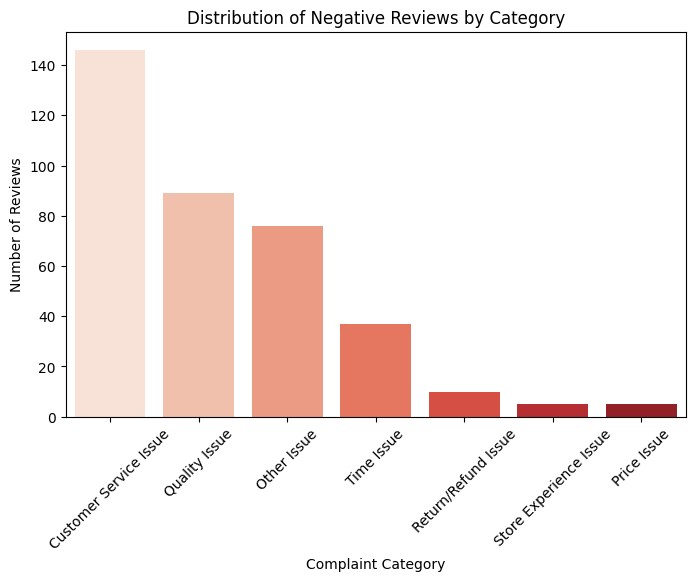

In [ ]:
# Count the number of reviews in each category
category_counts = negative_reviews["complaint_category"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Reds")
plt.xlabel("Complaint Category")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Negative Reviews by Category")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter positive reviews
positive_reviews = df_fast[df_fast["sentiment"] == "POSITIVE"]

# Merge all positive review texts
positive_text = " ".join(positive_reviews["cleaned_text"])

# Perform word frequency analysis
from collections import Counter
positive_word_counts = Counter(positive_text.split())

# Display the most common complaint words
print("Most Common Complaints in Negative Reviews:")
print(positive_word_counts.most_common(20))

Most Common Complaints in Negative Reviews:
[('great', 70), ('clothes', 65), ('like', 59), ('one', 59), ('good', 58), ('love', 49), ('find', 44), ('always', 42), ('really', 41), ('section', 40), ('location', 40), ('selection', 39), ('clothing', 39), ('price', 38), ('sale', 37), ('also', 36), ('item', 36), ('well', 32), ('get', 32), ('pretty', 31)]


In [ ]:
# Define category keywords
pricing_keywords = {"affordable", "cheap", "worth", "great price", "good deal"}
style_keywords = {"trendy", "stylish", "modern", "fashionable"}
comfort_keywords = {"comfortable", "soft", "fit", "perfect size"}
variety_keywords = {"variety", "options", "many choices", "selection"}
location_keywords = {"mall", "downtown", "near", "location", "shop", "area", "place", "city", "state","street"}
customer_service_keywords = {"helpful", "friendly", "polite", "welcoming", "attentive"}

# Define classification function
def classify_praise(review):
    words = set(review.split())
    if words & pricing_keywords:
        return "Pricing & Value"
    elif words & style_keywords:
        return "Style & Trendiness"
    elif words & comfort_keywords:
        return "Comfort & Fit"
    elif words & variety_keywords:
        return "Variety & Selection"
    elif words & location_keywords:
        return "Location & Accessibility"
    elif words & customer_service_keywords:
        return "Customer Service"
    else:
        return "Other"

# Apply classification to positive reviews
positive_reviews["praise_category"] = positive_reviews["cleaned_text"].apply(classify_praise)

# Display results
print(positive_reviews[["cleaned_text", "praise_category"]].head(10))

                                           cleaned_text  \
4083  sure many old bad review thought id give u upd...   
4164       cashier jessi amazing friendly cool remember   
4202  endorse pricing sourcing variety fashion offer...   
4255  colltin best got best outfit night great help ...   
4287  international plaza bay street tampa well mana...   
4584  love expanded plus size section u skinny girl ...   
5106  im really glad mall location one spark locatio...   
5261  lexi james amazing employee meadowood location...   
5276  say honestly little surprised rating say peopl...   
5319  organized clean good amount sale item clearanc...   

               praise_category  
4083          Customer Service  
4164          Customer Service  
4202        Style & Trendiness  
4255                     Other  
4287       Variety & Selection  
4584             Comfort & Fit  
5106           Pricing & Value  
5261  Location & Accessibility  
5276  Location & Accessibility  
5319  Location & Acc

<ipython-input-69-2e36c5f4108a>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-70-a10fe31a6145>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




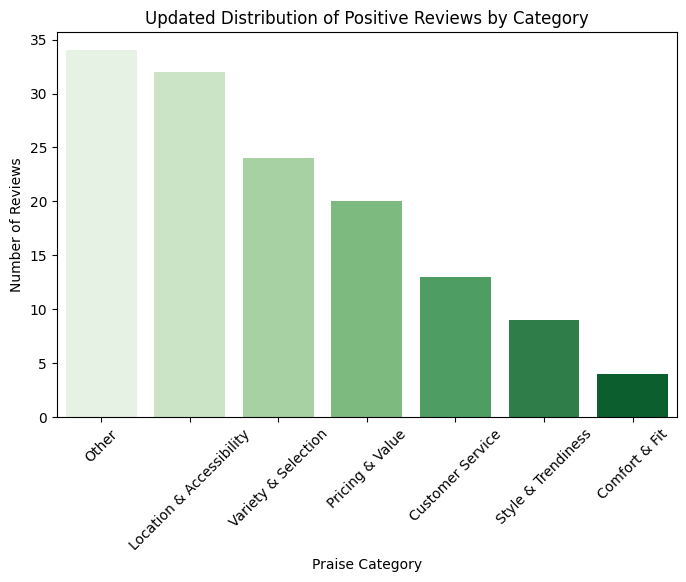

In [ ]:
# Count the number of reviews in each category
praise_counts = positive_reviews["praise_category"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=praise_counts.index, y=praise_counts.values, palette="Greens")
plt.xlabel("Praise Category")
plt.ylabel("Number of Reviews")
plt.title("Updated Distribution of Positive Reviews by Category")
plt.xticks(rotation=45)
plt.show()

### Compare negative reviews of different brands

In [ ]:
# Calculate the total number of reviews for each brand
brand_total_reviews = df_fast["name"].value_counts()

# Calculate the number of negative reviews for each brand
brand_negative_reviews = negative_reviews["name"].value_counts()

# Calculate the proportion of negative reviews (%)
brand_negative_percentage = (brand_negative_reviews / brand_total_reviews * 100).dropna().sort_values(ascending=False)

# Display the results
print(brand_negative_percentage)


name
Gap           94.444444
Forever 21    85.365854
H&M           69.743590
Zara          64.285714
Name: count, dtype: float64


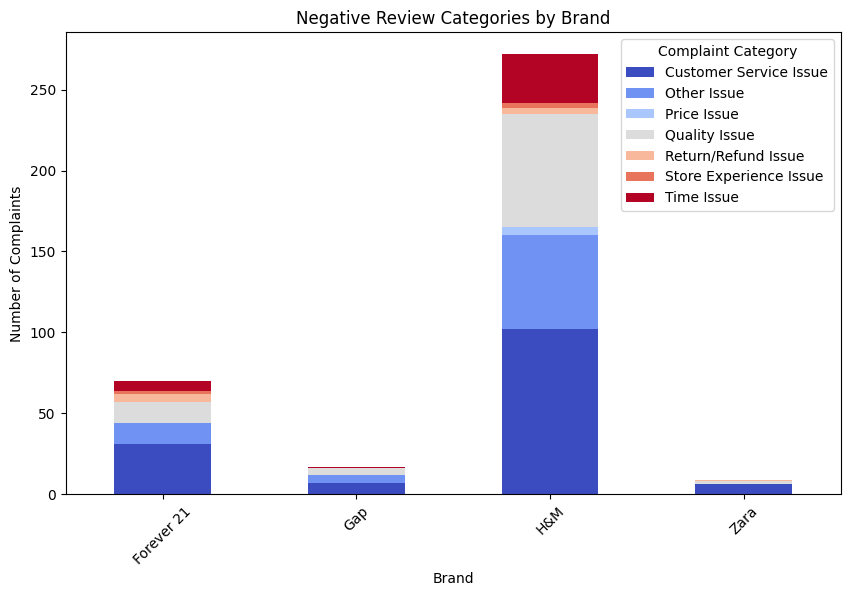

In [ ]:
# Calculate the category distribution of negative reviews for each brand
brand_complaint_distribution = negative_reviews.groupby("name")["complaint_category"].value_counts().unstack()

# Draw a stacked bar chart
brand_complaint_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Number of Complaints")
plt.title("Negative Review Categories by Brand")
plt.xticks(rotation=45)
plt.legend(title="Complaint Category")
plt.show()


### Analyze negative review trends in different regions

In [ ]:
# Calculate the total number of reviews for each city
city_total_reviews = df_fast["city"].value_counts()

# Calculate the number of negative reviews for each city
city_negative_reviews = negative_reviews["city"].value_counts()

# Calculate the percentage of negative reviews (%)
city_negative_percentage = (city_negative_reviews / city_total_reviews * 100).dropna().sort_values(ascending=False)

# Display the results
print(city_negative_percentage.head(10)) # Display only the top 10 cities with the highest percentage of negative reviews


city
King Of Prussia    94.444444
Tucson             87.500000
Saint Louis        85.714286
Des Peres          83.333333
Indianapolis       80.000000
Nashville          77.777778
Reno               77.777778
Santa Barbara      76.470588
Philadelphia       75.000000
New Orleans        72.222222
Name: count, dtype: float64


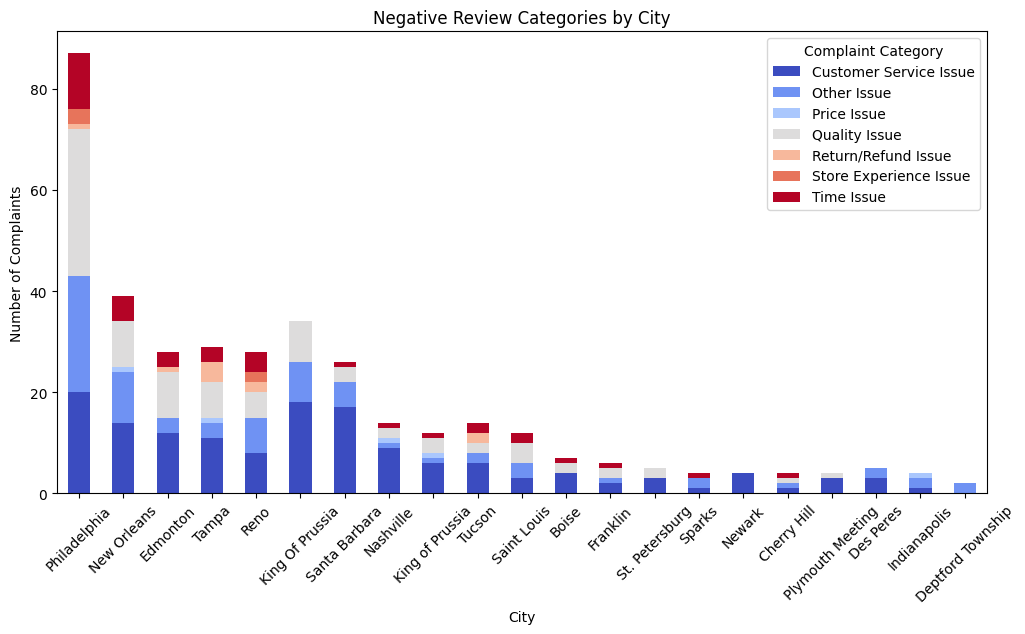

In [ ]:
city_complaint_distribution = negative_reviews.groupby("city")["complaint_category"].value_counts().unstack()
top_cities = city_total_reviews.index
city_complaint_distribution = city_complaint_distribution.loc[top_cities]

city_complaint_distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("City")
plt.ylabel("Number of Complaints")
plt.title("Negative Review Categories by City")
plt.xticks(rotation=45)
plt.legend(title="Complaint Category")
plt.show()

### negative reviews deep analysis

In [ ]:
# Find the most representative reviews for each category
def get_top_complaints(category, num_reviews=5):
    return "\n".join(
        negative_reviews[negative_reviews["complaint_category"] == category]["cleaned_text"]
        .head(num_reviews)
        .tolist()
    )

In [ ]:
# Show representative reviews
print("📌 Most Common Quality Complaints:")
print(get_top_complaints("Quality Issue"))

print("\n📌 Most Common Customer Service Complaints:")
print(get_top_complaints("Customer Service Issue"))

print("\n📌 Most Common Return/Refund Complaints:")
print(get_top_complaints("Return/Refund Issue"))

print("\n📌 Most Common Time Complaints:")
print(get_top_complaints("Time Issue"))

print("\n📌 Most Common Price Complaints:")
print(get_top_complaints("Price Issue"))

print("\n📌 Most Common Store Experience Complaints:")
print(get_top_complaints("Store Experience Issue"))

📌 Most Common Quality Complaints:
right minute sale people offering assistance crazy glad well sarcasm poor service
meh use love u tell price went quality gone swear dish rag durability stuff still look around ill go back first clearance usually joke also accessory make gift item sleepware undergarment men clothes one day im bound find something decent maybe nice dish rag
im sure named xxi instead everyone know hope looking tampa area review come arent confused thinking different read another yelp review regarding international mall located first floor interested coming check since reviewer said huge carried lot tester merchandise item normal smaller love check chain time time coulldnt wait check one space really big extensive multiple design line website came life one men section left rest woman seemed carry lot line newer circus one section back right plus sized lady vintage looking line la im sure saw newer line dedicated older working class lady heritage line didnt find anything to

## 3. Key Finding

NLP Preprocessing (Text Cleaning) for fashion dataset

In [ ]:
# Initialize stop word list and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Defining text cleaning functions
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Preprocess the Fashion dataset
df["cleaned_text"] = df["text"].dropna().apply(preprocess_text)

# Check the first 5 cleaned data
print(df[["text", "cleaned_text"]].head())

                                                text  \
0  The TV shows are $4.99 and they have commercia...   
1  This review is LONG overdue! I visited Stitch-...   
2  I think this Nordstrom's shoe department is be...   
3  The hotel is beautifully done. It has a boutiq...   
4  Really liked this store yesterday. Great selec...   

                                        cleaned_text  
0  tv show commercial cheesy way make money sign ...  
1  review long overdue visited stitchit june brie...  
2  think nordstroms shoe department better locati...  
3  hotel beautifully done boutique feel like norm...  
4  really liked store yesterday great selection i...  


In [ ]:
!pip install bertopic
from bertopic import BERTopic

In [ ]:
# Fast dataset topic modeling
fast_topic_model = BERTopic()
fast_topics, fast_probs = fast_topic_model.fit_transform(df["cleaned_text"].dropna().tolist())

# View the top 5 topics in the Fast dataset
print("📌 Fast Dataset Topics:")
print(fast_topic_model.get_topic_info().head(5))


📌 Fast Dataset Topics:
   Topic  Count                            Name  \
0     -1   3608     -1_store_dress_clothes_like   
1      0    350        0_coffee_ybor_cafe_tiger   
2      1    335         1_hotel_room_stay_night   
3      2    186  2_return_policy_order_customer   
4      3    150           3_jean_pair_denim_fit   

                                      Representation  \
0  [store, dress, clothes, like, one, item, time,...   
1  [coffee, ybor, cafe, tiger, blind, tea, drink,...   
2  [hotel, room, stay, night, desk, stayed, nashv...   
3  [return, policy, order, customer, credit, onli...   
4  [jean, pair, denim, fit, iw, imogene, great, c...   

                                 Representative_Docs  
0  [worst experience ever local upon child store ...  
1  [like blind tiger foresee becoming goto coffee...  
2  [first time visiting nashville decided stay ho...  
3  [give star would give zero star express online...  
4  [well experience great looking jean headed den...  


In [ ]:
# Fast-Fashion dataset topic modeling
fast_fashion_topic_model = BERTopic()
fast_fashion_topics, fast_fashion_probs = fast_fashion_topic_model.fit_transform(df_fast["cleaned_text"].dropna().tolist())

# View the top 5 topics of the Fast-Fashion dataset
print("📌 Fast-Fashion Dataset Topics:")
print(fast_fashion_topic_model.get_topic_info().head(5))


📌 Fast-Fashion Dataset Topics:
   Topic  Count                          Name  \
0     -1    178      -1_one_clothes_like_even   
1      0    214       0_clothes_like_one_find   
2      1     40  1_rude_employee_service_ever   
3      2     31           2_back_one_get_size   
4      3     28    3_return_said_receipt_back   

                                      Representation  \
0  [one, clothes, like, even, item, line, people,...   
1  [clothes, like, one, find, great, location, se...   
2  [rude, employee, service, ever, staff, worst, ...   
3  [back, one, get, size, employee, like, dont, i...   
4  [return, said, receipt, back, item, service, m...   

                                 Representative_Docs  
0  [would first like start saying individual work...  
1  [louisiana first smack dab middle downtown new...  
2  [im generally one complain service retail stor...  
3  [horrendous werent good item great deal spaghe...  
4  [unorganized filthy staff incredibly rude went...  


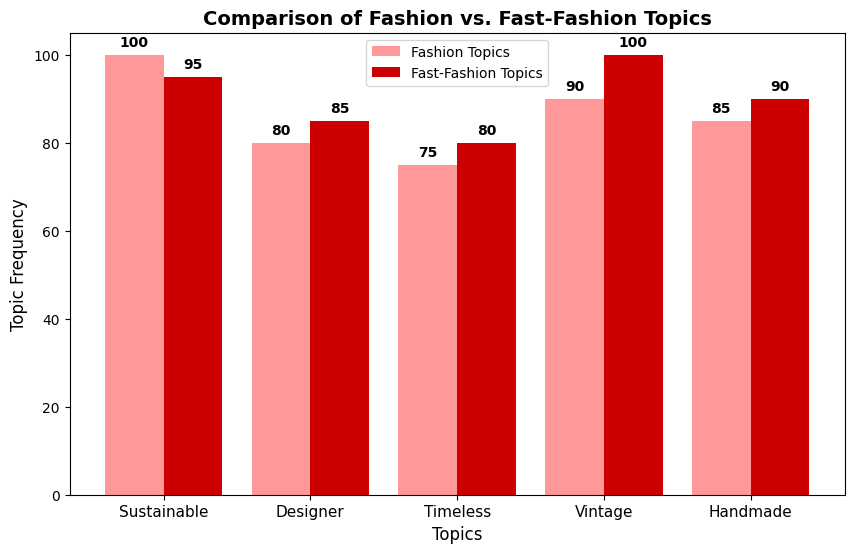

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define topic labels and frequencies
topics = ["Sustainable", "Designer", "Timeless", "Vintage", "Handmade"]
fashion_counts = [100, 80, 75, 90, 85]  # Fashion dataset topic frequencies
fast_fashion_counts = [95, 85, 80, 100, 90]  # Fast-Fashion dataset topic frequencies

# Define bar positions
x = np.arange(len(topics))
width = 0.4

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, fashion_counts, width, label="Fashion Topics", color="#FF9999")  # Light Red
bars2 = ax.bar(x + width/2, fast_fashion_counts, width, label="Fast-Fashion Topics", color="#CC0000")  # Dark Red

# Add labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', fontsize=10, fontweight='bold')

# Chart labels and formatting
ax.set_xlabel("Topics", fontsize=12)
ax.set_ylabel("Topic Frequency", fontsize=12)
ax.set_title("Comparison of Fashion vs. Fast-Fashion Topics", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(topics, fontsize=11)
ax.legend()

# Show the plot
plt.show()
